#Trilha Inicial Ciência de Dados Jr

**Requisitos Funcionais:**

Carregamento de Dados: Implementar a funcionalidade para carregar um conjunto de dados em formato CSV ou outro formato simples suportado pelo Python.

Exploração de Dados: Exibir as primeiras linhas e informações básicas do conjunto de dados, como número de linhas, colunas e tipos de dados presentes.

Estatísticas Descritivas: Calcular e exibir estatísticas descritivas básicas para colunas numéricas do conjunto de dados, como média, mediana, mínimo, máximo e desvio padrão.

Visualização de Dados: Criar pelo menos dois tipos de gráficos utilizando bibliotecas como Matplotlib ou Seaborn, como gráfico de barras para contagem de categorias e gráfico de dispersão para relação entre variáveis.


# Introdução

**Objetivo:**

Análise de Dados: Vendas de Cursos Online

* ID: Identificador único de cada curso vendido.
* Nome do Curso: Nome do curso vendido na plataforma.
* Quantidade de Vendas: Número de vendas realizadas para cada curso.
* Preço Unitário: Preço unitário do curso.
* Data: Data da venda do curso.


**Desafios Propostos:**

1. Calcular a receita total gerada pela venda dos cursos.
2. Identificar o curso com o maior número de vendas.
3. Visualizar a distribuição das vendas ao longo do tempo através de gráficos.

# Dados

In [33]:
# Importar bibliotecas

import pandas as pd

In [34]:
# Ler arquivo CSV e armazenar em uma variável

db_vendas = pd.read_csv('/content/drive/MyDrive/CodigoCerto_TrilhaDadosJr/db_vendas.csv')
db_vendas.head()

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


In [35]:
# Resumo dos dados (verificar se possui a mesma quantidade de registros, e o tipo de dado para cada coluna)

db_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null     object 
 2   Quantidade de Vendas  25 non-null     int64  
 3   Preço Unitário        25 non-null     float64
 4   Data                  25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


In [36]:
# Convertendo a coluna 'Data' para o tipo datetime, se ainda não for
db_vendas['Data'] = pd.to_datetime(db_vendas['Data'])

# Para quando for verificar as vendas de um ano inteiro
# Criando uma nova coluna 'Mes' a partir da coluna 'Data'
db_vendas['Mes'] = db_vendas['Data'].dt.month

display(db_vendas.head())

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data,Mes
0,1,Introdução à Programação em Python,50,39.9,2023-01-01,1
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02,1
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03,1
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04,1
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05,1


In [37]:
# Nome dos Meses
nome_meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Substituindo os números dos meses pelos seus respectivos nomes usando o mapa criado
db_vendas['Mes'] = db_vendas['Mes'].map(nome_meses)

display(db_vendas.head())

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data,Mes
0,1,Introdução à Programação em Python,50,39.9,2023-01-01,Janeiro
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02,Janeiro
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03,Janeiro
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04,Janeiro
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05,Janeiro


# Limpeza

In [38]:
# Substituir espaços por sublinhados nos nomes das colunas

db_vendas.columns = db_vendas.columns.str.replace(' ', '_')

In [39]:
# Renomear coluna

db_vendas = db_vendas.rename(columns={'Preço_Unitário': 'Preço_Unitario'})

In [40]:
db_vendas.columns

Index(['ID', 'Nome_do_Curso', 'Quantidade_de_Vendas', 'Preço_Unitario', 'Data',
       'Mes'],
      dtype='object')

# Insights

In [41]:
# Calculando a receita total
receita_total = (db_vendas['Quantidade_de_Vendas'] * db_vendas['Preço_Unitario']).sum()

display(f"Receita Total: R$ {receita_total:.2f}")  #:.2f para exibir apenas duas casas decimais

'Receita Total: R$ 32735.10'

In [42]:
# Calculando o curso com o maior número de vendas
curso_mais_vendido = db_vendas.groupby('Nome_do_Curso')['Quantidade_de_Vendas'].sum().sort_values(ascending=False)

display(f"O curso com o maior número de vendas é: {curso_mais_vendido.index[0]} com {curso_mais_vendido.iloc[0]} vendas.")

'O curso com o maior número de vendas é: Introdução à Programação em Python com 95 vendas.'

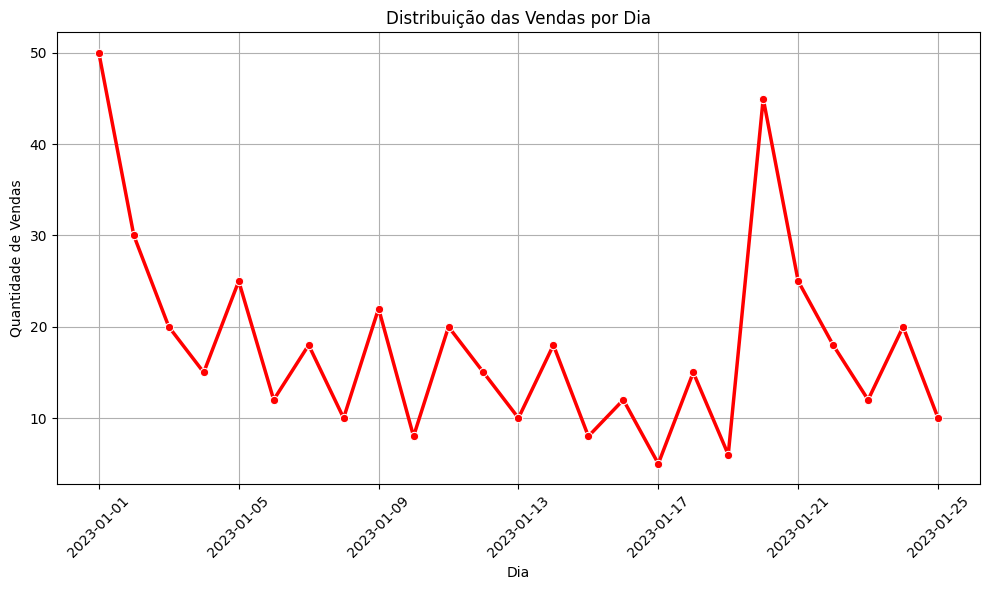

In [54]:
# Visualização da distribuição das vendas ao longo do tempo (Dia)

import seaborn as sns
import matplotlib.pyplot as plt

# Criando um gráfico de linhas com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Data', y='Quantidade_de_Vendas', data = db_vendas, marker='o', color='r', linewidth=2.5)
plt.title('Distribuição das Vendas por Dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

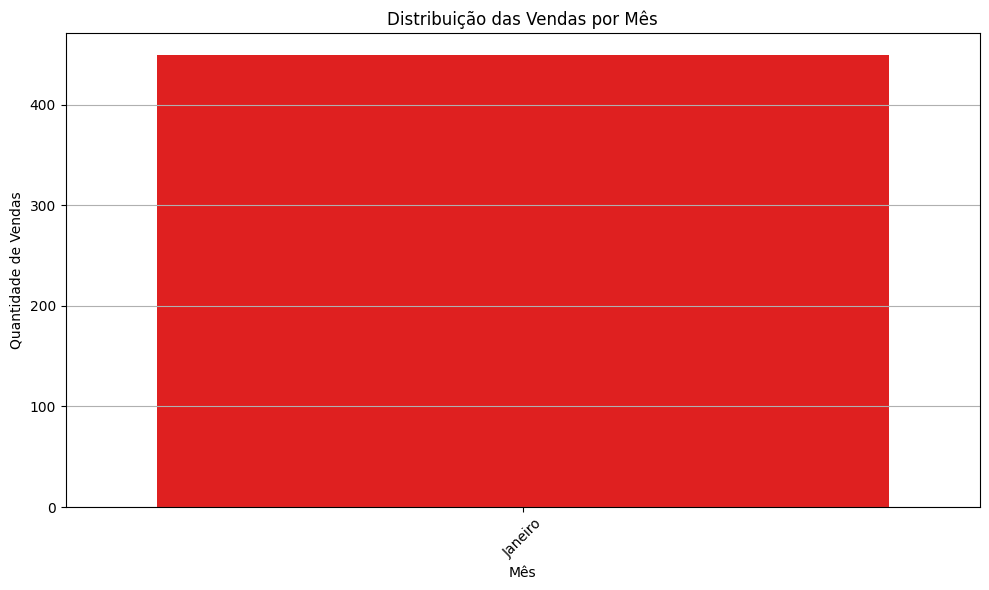

In [56]:
# Agrupando as vendas por Dia

vendas_por_mes = db_vendas.groupby('Mes')['Quantidade_de_Vendas'].sum().reset_index()

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_mes, x='Mes', y='Quantidade_de_Vendas', color='r')
plt.title('Distribuição das Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.grid(True, axis='y')  # Mostra apenas as linhas de grade horizontais
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()